### Data Science in Python (with SimpliLean)
#### Project: Comcast Consumer Complaints
#### Submitted by: Yanda Sebega
#### Date: 9-Sep-2021



In [1]:
# Import necessary libraries
import pandas as pd
import numpy as mp
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup
from datetime import datetime
%matplotlib inline

#### Import data into Python environment.

In [2]:
# Read the data 
df = pd.read_csv('Comcast_telecom_complaints_data.csv', index_col='Date_month_year')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 22-Apr-15 to 24-Jun-15
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


In [4]:
# Convert the index into datetime as it is object
df.index = pd.to_datetime(df.index)

In [5]:
# Check the data with head method
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No
2015-04-18,242732,Speed and Service,18-04-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No


In [6]:
# Check the data with tail method
df.tail()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone
Date_month_year,,,,,,,,,,
2015-02-04,213550,Service Availability,04-02-15,9:13:18 AM,Customer Care Call,Youngstown,Florida,32466,Closed,No
2015-02-06,318775,Comcast Monthly Billing for Returned Modem,06-02-15,1:24:39 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2015-09-06,331188,complaint about comcast,06-09-15,5:28:41 PM,Internet,Ypsilanti,Michigan,48197,Solved,No
2015-06-23,360489,Extremely unsatisfied Comcast customer,23-06-15,11:13:30 PM,Customer Care Call,Ypsilanti,Michigan,48197,Solved,No
2015-06-24,363614,"Comcast, Ypsilanti MI Internet Speed",24-06-15,10:28:33 PM,Customer Care Call,Ypsilanti,Michigan,48198,Open,Yes


In [7]:
# Check the dimensionality of the dataset
df.shape

(2224, 10)

In [8]:
# Check the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2224 entries, 2015-04-22 to 2015-06-24
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ticket #                     2224 non-null   object
 1   Customer Complaint           2224 non-null   object
 2   Date                         2224 non-null   object
 3   Time                         2224 non-null   object
 4   Received Via                 2224 non-null   object
 5   City                         2224 non-null   object
 6   State                        2224 non-null   object
 7   Zip code                     2224 non-null   int64 
 8   Status                       2224 non-null   object
 9   Filing on Behalf of Someone  2224 non-null   object
dtypes: int64(1), object(9)
memory usage: 191.1+ KB


#### Provide the trend chart for the number of complaints at monthly and daily granularity levels.

Text(0.5, 1.0, 'Monthly Complaints')

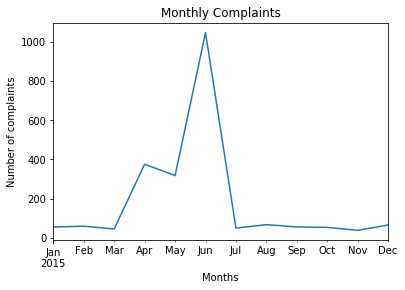

In [9]:
# Group data by month by resampling...any column with teh count with give total.
df['State'].resample('M').count().plot()
plt.xlabel('Months')
plt.ylabel('Number of complaints')
plt.title('Monthly Complaints')

Text(0.5, 1.0, 'Daily Complaints')

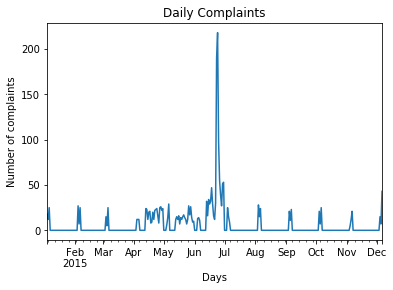

In [10]:
# Group data by day by resampling...any columnn with the count method with give the daily total.
df['City'].resample('D').count().plot()
plt.xlabel('Days')
plt.ylabel('Number of complaints')
plt.title('Daily Complaints')

#### A table with the frequency of complaint types.

In [11]:
df['complaints'] = df['Customer Complaint'].str.lower().str.replace('[^\w\s]','')

In [245]:
frequent_words = df.complaints.str.split(expand=True).stack().value_counts()

In [246]:
frequent_words

comcast     1183
internet     517
service      444
billing      281
and          277
            ... 
dealing        1
catv           1
trouble        1
health         1
monetary       1
Length: 1589, dtype: int64

We can draw the following categories from the above table:
- Internet
- Network (as in cap(s), speed(s), data, throttling, cable)
- Billing (bill)
- Charges
- Others( anything else different from the above categories)

In [17]:
#df['Category'] = df.apply(inpute_category)

In [ ]:
df.head(20)

In [60]:
categories = {
    'Internet': len(df[df['Customer Complaint'].str.contains('internet', regex=True, case=False)]),
    'Networking': len(df[df['Customer Complaint'].str.contains('cap|speed|throttling|cable', regex=True, case=False)]),
    'Billing': len(df[df['Customer Complaint'].str.contains('billing', regex=True, case=False)]),
    'Charges': len(df[df['Customer Complaint'].str.contains('charge', regex=True, case=False)]),
    'Others': len(df[~df['Customer Complaint'].str.contains('charge|billing|internet|cap|speed|throttling|cable', regex=True, case=False)]),
}

In [61]:
# frequency of complaint types
categories_stats = pd.DataFrame([categories])
categories_stats

,Internet,Networking,Billing,Charges,Others
0,532,469,298,139,1026


#### Which complaint types are maximum i.e., around internet, network issues, or across any other domains.
#### New categorical variable with value as Open and Closed. Open & Pending is categorized as Open and Closed & Solved is categorized as Closed.

In [80]:
#Create a new categorical variable with value as Open and Closed. 
#Open & Pending is to be categorized as Open and Closed & Solved is to be categorized as Closed
df['New_Status'] = df.Status.map({'Open':'Open', 'Pending':'Open', 'Closed':'Closed', 'Solved':'Closed'})

In [81]:
df.head()

,Ticket #,Customer Complaint,Date,Time,Received Via,City,State,Zip code,Status,Filing on Behalf of Someone,complaints,New_Categorical,New_Status
Date_month_year,,,,,,,,,,,,,
2015-04-22,250635,Comcast Cable Internet Speeds,22-04-15,3:53:50 PM,Customer Care Call,Abingdon,Maryland,21009,Closed,No,comcast cable internet speeds,Closed,Closed
2015-08-04,223441,Payment disappear - service got disconnected,04-08-15,10:22:56 AM,Internet,Acworth,Georgia,30102,Closed,No,payment disappear service got disconnected,Closed,Closed
2015-04-18,242732,Speed and Service,18-04-15,9:55:47 AM,Internet,Acworth,Georgia,30101,Closed,Yes,speed and service,Closed,Closed
2015-07-05,277946,Comcast Imposed a New Usage Cap of 300GB that ...,05-07-15,11:59:35 AM,Internet,Acworth,Georgia,30101,Open,Yes,comcast imposed a new usage cap of 300gb that ...,Open,Open
2015-05-26,307175,Comcast not working and no service to boot,26-05-15,1:25:26 PM,Internet,Acworth,Georgia,30101,Solved,No,comcast not working and no service to boot,Closed,Closed


#### State wise status of complaints in a stacked bar chart. 

In [119]:
df.State.unique()

array(['Maryland', 'Georgia', 'Michigan', 'California', 'New Mexico',
       'Indiana', 'Virginia', 'Illinois', 'Pennsylvania', 'Massachusetts',
       'Oregon', 'Texas', 'New Hampshire', 'Minnesota', 'Tennessee',
       'Colorado', 'Florida', 'Alabama', 'Washington', 'New York',
       'New Jersey', 'Maine', 'Missouri', 'West Virginia', 'Montana',
       'Mississippi', 'Connecticut', 'Vermont', 'Kentucky',
       'South Carolina', 'Ohio', 'Utah', 'Delaware', 'Arkansas', 'Nevada',
       'Louisiana', 'Kansas', 'Arizona', 'North Carolina', 'Rhode Island',
       'District Of Columbia', 'District of Columbia', 'Iowa'],
      dtype=object)

In [120]:
# Replace DC with the correct spelling.
df.replace('District Of Columbia', 'District of Columbia', inplace=True)

In [121]:
df.groupby(by='State').size().sort_values(ascending=False).head()

State
Georgia       288
Florida       240
California    220
Illinois      164
Tennessee     143
dtype: int64

In [122]:
# Group by state and the new status category
complaints_by_state = df.groupby(by=['State', 'New_Status']).size().unstack()

In [123]:
# Unstacking creates NaN values. 
complaints_by_state.fillna(0).head()

New_Status,Closed,Open
State,,
Alabama,17.0,9.0
Arizona,14.0,6.0
Arkansas,6.0,0.0
California,159.0,61.0
Colorado,58.0,22.0


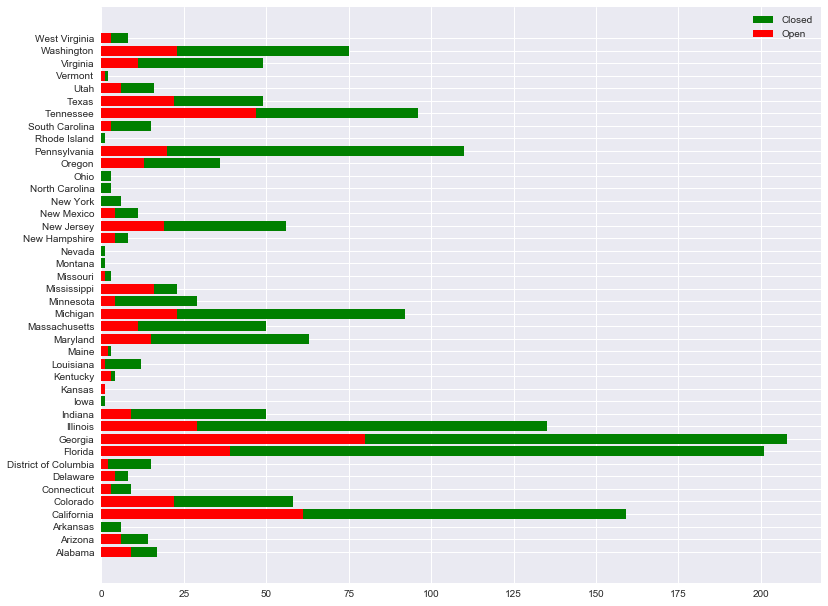

In [198]:
#complaints_by_state.plot(kind='barh', figsize=(15, 8))
#plt.bar(complaints_by_state)
plt.style.use('seaborn')
fig = plt.figure(figsize=(10, 8))
ax = fig.add_axes([0,0,1,1])
ax.barh(complaints_by_state.index, complaints_by_state['Closed'], color='g')
ax.barh(complaints_by_state.index, complaints_by_state['Open'],  color='r')
ax.legend(labels=['Closed', 'Open'])


#### State with the maximum complaints and the highest percentage of unresolved complaints

In [134]:
# Maximum complaints
df.groupby(by='State').size().sort_values(ascending=False).head(1)

State
Georgia    288
dtype: int64

In [173]:
# Highest percentage of unresolved complaints.
complaints_by_state[complaints_by_state['Open']==complaints_by_state['Open'].max()]
#complaints_by_state.index[complaints_by_state.Closed.argmax()]

New_Status,Closed,Open
State,,
Georgia,208.0,80.0


#### Percentage of complaints resolved till date, which were received through the Internet and customer care calls.

In [234]:
# Provide the percentage of complaints resolved till date, which were received through the Internet and customer care calls.
# Criteria
internet = df['Received Via'] == 'Internet' 
cust_care = df['Received Via'] == 'Customer Care Call'
closed = df['New_Status'] == 'Closed'

# Resolved till date, which were received through Internet
percentage_thru_internet = round(100 * len(df[internet & closed])/len(df), 2)
print("Internet: "+ str(percentage_thru_internet) + '%')

# Resolved till date, which were received through Customer care
percentage_thru_cust_care = round(100 * len(df[cust_care & closed])/len(df), 2)
print("Customer care: " + str(percentage_thru_cust_care) + '%')

Internet: 37.9%
Customer care: 38.85%
